# **LAB EXERCISE - 5**

In [80]:
from sklearn.datasets import fetch_california_housing

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from keras.layers.merge import concatenate

In [81]:
california = fetch_california_housing()

In [82]:
# Description of the dataset:

print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [83]:
# Shape of Data and Target:

print(california.data.shape)
print(california.target.shape)

(20640, 8)
(20640,)


In [84]:
# Feature names:

california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [85]:
pd.set_option('precision', 4)
pd.set_option('max_columns', 9)
pd.set_option('display.width', None)

df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseValue'] = pd.Series(california.target)

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.9841,1.0238,322.0,2.5556,37.88,-122.23,4.526
1,8.3014,21.0,6.2381,0.9719,2401.0,2.1098,37.86,-122.22,3.585
2,7.2574,52.0,8.2881,1.0734,496.0,2.8023,37.85,-122.24,3.521
3,5.6431,52.0,5.8174,1.0731,558.0,2.5479,37.85,-122.25,3.413
4,3.8462,52.0,6.2819,1.0811,565.0,2.1815,37.85,-122.25,3.422


In [86]:
'''

    some features are trained and others are not(Directly fed in the output layer) ---> Viral NN with Functional API

'''

'\n\n    some features are trained and others are not(Directly fed in the output layer) ---> Viral NN with Functional API\n\n'

In [87]:
df.isnull().sum()

MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MedHouseValue    0
dtype: int64

In [88]:
df1 = df.copy()
df1.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.9841,1.0238,322.0,2.5556,37.88,-122.23,4.526
1,8.3014,21.0,6.2381,0.9719,2401.0,2.1098,37.86,-122.22,3.585
2,7.2574,52.0,8.2881,1.0734,496.0,2.8023,37.85,-122.24,3.521
3,5.6431,52.0,5.8174,1.0731,558.0,2.5479,37.85,-122.25,3.413
4,3.8462,52.0,6.2819,1.0811,565.0,2.1815,37.85,-122.25,3.422


In [89]:
scaler = MinMaxScaler()

for column in df1:
  df1[[column]] = scaler.fit_transform(df1[[column]])

In [90]:
df1.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,0.5397,0.7843,0.0435,0.0205,0.0089,0.0015,0.5675,0.2112,0.9023
1,0.5380,0.3922,0.0382,0.0189,0.0672,0.0011,0.5654,0.2122,0.7082
2,0.4660,1.0000,0.0528,0.0219,0.0138,0.0017,0.5643,0.2102,0.6951
3,0.3547,1.0000,0.0352,0.0219,0.0156,0.0015,0.5643,0.2092,0.6728
4,0.2308,1.0000,0.0385,0.0222,0.0158,0.0012,0.5643,0.2092,0.6746


In [91]:
y = df1.pop('MedHouseValue')
x = df1.copy()

In [92]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.5397,0.7843,0.0435,0.0205,0.0089,0.0015,0.5675,0.2112
1,0.5380,0.3922,0.0382,0.0189,0.0672,0.0011,0.5654,0.2122
2,0.4660,1.0000,0.0528,0.0219,0.0138,0.0017,0.5643,0.2102
3,0.3547,1.0000,0.0352,0.0219,0.0156,0.0015,0.5643,0.2092
4,0.2308,1.0000,0.0385,0.0222,0.0158,0.0012,0.5643,0.2092
...,...,...,...,...,...,...,...,...
20635,0.0731,0.4706,0.0298,0.0237,0.0236,0.0015,0.7375,0.3247
20636,0.1419,0.3333,0.0373,0.0291,0.0099,0.0020,0.7386,0.3127
20637,0.0828,0.3137,0.0309,0.0233,0.0281,0.0013,0.7322,0.3118
20638,0.0943,0.3333,0.0318,0.0249,0.0207,0.0012,0.7322,0.3018


In [93]:
y

0        0.9023
1        0.7082
2        0.6951
3        0.6728
4        0.6746
          ...  
20635    0.1301
20636    0.1280
20637    0.1594
20638    0.1437
20639    0.1534
Name: MedHouseValue, Length: 20640, dtype: float64

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 50)

> ## **MODEL - 1: MLP for Regression using Sequential API**

In [95]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape = [8], name = 'InputLayer'))
model.add(tf.keras.layers.Dense(30, activation = 'relu', name = 'HiddenLayer'))
model.add(tf.keras.layers.Dense(1, activation = 'relu', name = 'OutputLayer'))

optz = tf.keras.optimizers.Adam(learning_rate = 0.0001)

model.compile(loss = 'mse', optimizer = optz, metrics = tf.keras.metrics.RootMeanSquaredError())

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer (Dense)         (None, 30)                270       
                                                                 
 OutputLayer (Dense)         (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


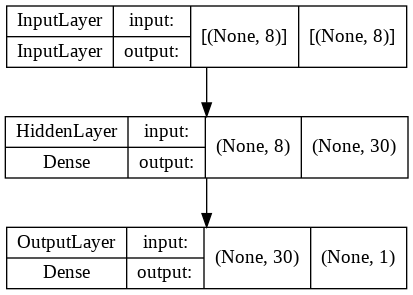

In [96]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [97]:
history = model.fit(x_train, y_train, batch_size = 40, epochs = 20, validation_split = 0.2)

Epoch 1/20
331/331 [==============================] - 2s 4ms/step - loss: 0.1168 - root_mean_squared_error: 0.3417 - val_loss: 0.0683 - val_root_mean_squared_error: 0.2613
Epoch 2/20
331/331 [==============================] - 1s 3ms/step - loss: 0.0580 - root_mean_squared_error: 0.2409 - val_loss: 0.0552 - val_root_mean_squared_error: 0.2349
Epoch 3/20
331/331 [==============================] - 1s 3ms/step - loss: 0.0495 - root_mean_squared_error: 0.2226 - val_loss: 0.0484 - val_root_mean_squared_error: 0.2200
Epoch 4/20
331/331 [==============================] - 1s 3ms/step - loss: 0.0437 - root_mean_squared_error: 0.2091 - val_loss: 0.0430 - val_root_mean_squared_error: 0.2073
Epoch 5/20
331/331 [==============================] - 1s 4ms/step - loss: 0.0389 - root_mean_squared_error: 0.1972 - val_loss: 0.0383 - val_root_mean_squared_error: 0.1957
Epoch 6/20
331/331 [==============================] - 1s 3ms/step - loss: 0.0347 - root_mean_squared_error: 0.1864 - val_loss: 0.0347 - val_

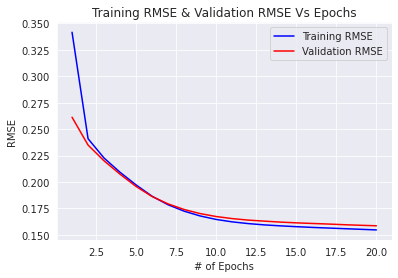

<Figure size 432x288 with 0 Axes>

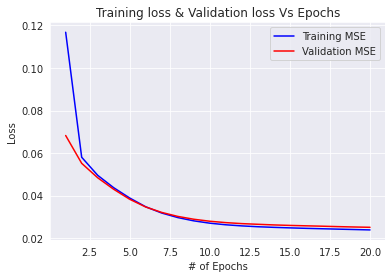

In [98]:
sb.set_style("darkgrid")

rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(rmse) + 1)

#Train and validation accuracy

plt.plot(epochs, rmse, 'b', label='Training RMSE')
plt.plot(epochs, val_rmse, 'r', label='Validation RMSE')
plt.xlabel('# of Epochs')
plt.ylabel('RMSE')
plt.title('Training RMSE & Validation RMSE Vs Epochs')
plt.legend()

plt.figure()

plt.show()

#Train and validation loss

plt.plot(epochs, loss, 'b', label='Training MSE')
plt.plot(epochs, val_loss, 'r', label='Validation MSE')
plt.xlabel('# of Epochs')
plt.ylabel('Loss')
plt.title('Training loss & Validation loss Vs Epochs')
plt.legend()

plt.show()

In [99]:
model.evaluate(x_test, y_test)

129/129 [==============================] - 0s 2ms/step - loss: 0.0238 - root_mean_squared_error: 0.1543


[0.02379932627081871, 0.15427030622959137]

> **CONCLUSION:**

The RMSE of the Model is 0.1543 and the MSE of the Model is 0.0238 which is generally considered low and the model performs quite good even though it is a simple and less complex neural network, It's evident from the plots that the model fits the data in a efficient way.

> ## **MODEL - 2: Wide & Deep Neural Network with Functional API**

In [100]:
from keras.layers.merge import concatenate

In [105]:
#model2 = tf.keras.Functional()

InputA = tf.keras.layers.Input(shape = [5], name = 'Input_A')
InputB = tf.keras.layers.Input(shape = [6], name = 'Input_B')

Hidden_1 = tf.keras.layers.Dense(30,  activation = 'relu', name = 'Hidden_1')(InputB)
Hidden_2 = tf.keras.layers.Dense(30,  activation = 'relu', name = 'Hidden_2')(Hidden_1)
X = tf.keras.Model(inputs = InputB, outputs = Hidden_2)

Concat = concatenate([InputA, X.output], name = 'Concat')

Output = tf.keras.layers.Dense(1, activation = 'linear', name = 'Output')(Concat)

model2 = tf.keras.Model(inputs=[InputA, InputB], outputs = Output)

optz = tf.keras.optimizers.Adam(learning_rate = 0.0001)
model2.compile(loss = 'mse', optimizer = optz, metrics = tf.keras.metrics.RootMeanSquaredError())

model2.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_B (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 Hidden_1 (Dense)               (None, 30)           210         ['Input_B[0][0]']                
                                                                                                  
 Input_A (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 Hidden_2 (Dense)               (None, 30)           930         ['Hidden_1[0][0]']               
                                                                                           

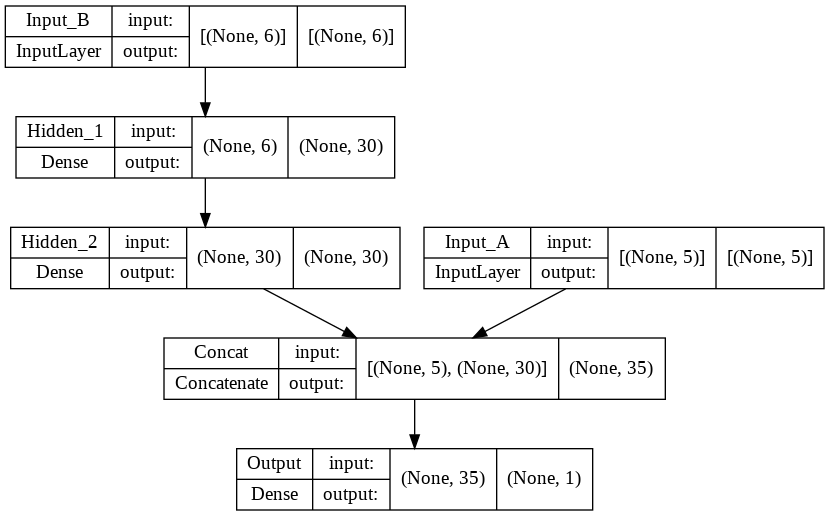

In [106]:
tf.keras.utils.plot_model(model2, show_shapes=True, show_layer_names=True)

In [113]:
Input_A_Data = x_train.iloc[:, 0:5]
Input_B_Data = x_train.iloc[:, 2:8]

In [116]:
history2 = model2.fit(x = [Input_A_Data, Input_B_Data], y = y_train, batch_size = 40, epochs = 20, validation_split = 0.2)

Epoch 1/20
331/331 [==============================] - 1s 4ms/step - loss: 0.0583 - root_mean_squared_error: 0.2414 - val_loss: 0.0591 - val_root_mean_squared_error: 0.2431
Epoch 2/20
331/331 [==============================] - 1s 4ms/step - loss: 0.0554 - root_mean_squared_error: 0.2353 - val_loss: 0.0565 - val_root_mean_squared_error: 0.2377
Epoch 3/20
331/331 [==============================] - 1s 4ms/step - loss: 0.0528 - root_mean_squared_error: 0.2297 - val_loss: 0.0540 - val_root_mean_squared_error: 0.2323
Epoch 4/20
331/331 [==============================] - 1s 4ms/step - loss: 0.0503 - root_mean_squared_error: 0.2242 - val_loss: 0.0514 - val_root_mean_squared_error: 0.2266
Epoch 5/20
331/331 [==============================] - 2s 5ms/step - loss: 0.0478 - root_mean_squared_error: 0.2186 - val_loss: 0.0489 - val_root_mean_squared_error: 0.2212
Epoch 6/20
331/331 [==============================] - 2s 5ms/step - loss: 0.0453 - root_mean_squared_error: 0.2127 - val_loss: 0.0465 - val_

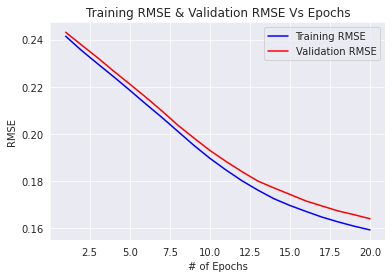

<Figure size 432x288 with 0 Axes>

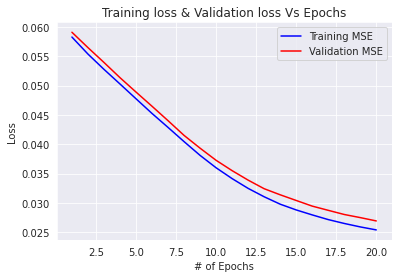

In [117]:
sb.set_style("darkgrid")

rmse = history2.history['root_mean_squared_error']
val_rmse = history2.history['val_root_mean_squared_error']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(rmse) + 1)

#Train and validation accuracy

plt.plot(epochs, rmse, 'b', label='Training RMSE')
plt.plot(epochs, val_rmse, 'r', label='Validation RMSE')
plt.xlabel('# of Epochs')
plt.ylabel('RMSE')
plt.title('Training RMSE & Validation RMSE Vs Epochs')
plt.legend()

plt.figure()

plt.show()

#Train and validation loss

plt.plot(epochs, loss, 'b', label='Training MSE')
plt.plot(epochs, val_loss, 'r', label='Validation MSE')
plt.xlabel('# of Epochs')
plt.ylabel('Loss')
plt.title('Training loss & Validation loss Vs Epochs')
plt.legend()

plt.show()

In [119]:
Test_A_Data = x_test.iloc[:, 0:5]
Test_B_Data = x_test.iloc[:, 2:8]

In [120]:
model2.evaluate(x = [Test_A_Data, Test_B_Data], y = y_test)

129/129 [==============================] - 0s 3ms/step - loss: 0.0252 - root_mean_squared_error: 0.1586


[0.02516474388539791, 0.1586339920759201]

> **CONCLUSION:**

The RMSE of the Model is 0.1586 and the MSE of the Model is 0.0252 which is generally considered low and the model performs quite good, But it's loss values are higher(not by a significant differnce) the previous model. From the plots we can infer that the model has nicely fit its evaluation curves.